# Stability analysis of the Meridional Overturning Circulation

As seen in class, Stommel [1961] introduced a useful 0-dimensional model exhibiting multiple equilibria for some choice of parameters. In this lab we will investigate the behavior of this model in a simple limiting case.

First, let's import a few useful Python modules

In [2]:
import numpy as np
%matplotlib inline
from scipy.integrate import odeint 
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # this will make the plots look professional, as opposed to the god-awful default

## Stability of Stommel 2-box model solutions 

### Model formulation ###
Stommel's model and analysis, though incredibly insightful, are formulated in a rather forbidding way for first-timers. Let's work instead with the model of Marotzke [1990]. In its most basic form, the model is comprised of two well-mixed boxes (1: high-latitude; 2: low-latitude) of equal volume. (see Figure 1) 

![title](img/stommel_box.png)



The flow strength, $q$, is related to the density difference by a linear law, $q = k (\rho_1-\rho_2)$ (1), where $k$ is a hydraulic constant. Let us assume a linear equation of state: $\rho = \rho_0 (1-\alpha (T - T_0) + \beta(S - S_0))$ where  $\alpha$ and $\beta$ are the thermal and haline expansion coefficients, respectively. The "0" subscript denotes reference values, which we can dispense here because they get subtracted out. Indeed:

$$ q = k \left [ \alpha(T_2 -T_1) - \beta(S_2-S_1) \right] \equiv k [\alpha \Delta T - \beta \Delta S] $$ 

  If $q > 0$, there is poleward surface flow because high-latitude density is greater than low-latitude density, and vice versa. In other words, when $q<0$, the temperature difference dominates the density difference and drives the circulation whereas the salinity difference brakes it, and vice versa.
  
To simplify the analysis, let us make the following simplification, due to Marotzke [1990]: we assume that the atmosphere controls the ocean temperature and the surface fresh-water loss or gain, $H_S$. Thus, we view $T_1$, $T_2$ , and $H_S$ as external parameters, prescribed by an omniscient entity (you).  

An interesting case, is one where a freshwater flux is imposed on the two boxes in equal and opposite ways: 
$\frac{d S_1}{dt} = -H_S + |q|\Delta S $ (2)
$\frac{d S_2}{dt} = +H_S - |q|\Delta S $ (3)

The absolute value term requires a little explanation. We postulate that flow into a box carries with it the properties, in particular the salinity, of the originating box. So, if $q>0$, the upper pipe brings water with salinity $S_2$ into Box 1, while the lower pipe takes water with $S_1$ out of Box 1. If $q<0$, it is the lower pipe that imports $S_2$ into Box 1, while the upper pipe exports $S_1$ out of Box 1. In either case, $S_2$ is imported into Box 1, while $S_1$ is exported out of Box 1, both at a rate given by the modulus of $q$. 

**Question 1**: Based on these equations, what do you immediately notice about $\frac{d S_1}{dt} + \frac{d S_2}{dt}$? What does that mean?


**Answer 1:**

Because of the simplification we made (temperature is imposed), this property means that there is only one variable we really need to worry about for this model: the salinity difference $\Delta S = S_2-S_1$. For simplicity, we will simply call it $S$ in the remainder of this lab.

Substituing equation (1) into (2) and (3), one gets a simple evolution equation for $S$: 
$$ \dot{S} = 2H_S - 2k \big | \alpha T - \beta S \big | S \quad (4)$$ 

Where, as usual, the dot denotes a time-derivative. Voilà: all the dynamics are encapsulated in this first-order differential equation. 

**Question 2** Is this equation linear? If not, why? What type of behavior do you think this might engender?


**Answer 2**:

We now wish to solve this equation. As usual in dynamical systems,  we can learn a lot by looking at its fixed points. However, there are many dimensional quantitities in this equation, which we would like to dispense with. Let us indulge in some non-dimensionalization.

### Non-dimensionalization ###
Remember that in this approximation $T$ is constant. Thus, we can define a non-dimensional salinity $\delta = \frac{\beta S}{\alpha T}$. Similarly, if we define the salt flux as $E = \frac{\beta H_s}{k(\alpha T)^2}$, then equation (4) simplifies to:

$$ \dot{\delta} = E - |1-\delta|\delta \equiv f(\delta) \quad (5)$$


This may not seem like a big deal to you, but this equation illuminates the fact that there is only one variable to worry about ($\delta$), and one parameter to influence it ($E$). Let us now look for its equilibria.

### Fixed Points ###
Easy! Just set $\dot{\delta}=0$ and you're on way. Well, not so fast: because of the absolute value sign, we need to be a little careful about how we solve this.

1) $\delta < 1$ case

**Question 3**
Show that the equation is a quadratic, and that the number of solutions depends on the sign of $1/4-E$.  Show that for $E<1/4$ there are two solutions: 
$$\delta_{1,2} = \frac{1}{2}\pm \sqrt{\frac{1}{4}-E}$$
How many solutions for $E = 1/4$, and what are they?  What about E>1/4? Verify that all solutions meet the assumption that $\delta < 1$.


**Answer 3 here (or on a piece of paper)**

2) $\delta \geq 1$ case

Show that the equation is a quadratic, and that it always has two solutions.
However, only one of them is physically plausible. Indeed, are working under the assumption that $\delta \geq 1$, which one of them does not satisfy. We are left with only one:
$$\delta_{3} = \frac{1}{2}+ \sqrt{\frac{1}{4}+E}$$


There we are. So depending on the value of $E$, we have between 1 and 3 solutions; just what Stommel had found. Now, are these stable or unstable fixed points?

### Stability analysis

To figure this out we need to look at the sign of the right-hand side of Eq(5): whenever $E>|1-\delta|\delta$ we know that $\dot{\delta}>0$, so $\delta$ must be increasing (and vice versa when the RHS is negative). So an easy way to see if our fixed points are stable is to (1) plot the stability curve (the solutions to $f(\delta)=0$ as a function of $E$ and (2) indicate the sign and magnitude of $f(\delta)=0$ by arrows, to show whether the system is moving towards a fixed point, or away from it.  Let's do it. 

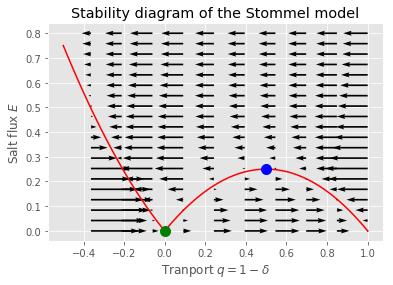

In [3]:
# Stability diagram
x = np.linspace(0,1.5,100)

Ef = np.empty_like(x)
idx = np.where(x<=1)
Ef  =  x*(x-1) # true only if x > 1
Ef[idx] =  x[idx]*(1-x[idx])

Evec = np.linspace(0,0.8,20)

plt.figure()
plt.plot(1-x,Ef,'r')
for E in Evec:
    Q = plt.quiver(1-x[::10],E,Ef[::10]-E,0, units='width',width = 0.005)
plt.xlabel(r'Tranport $q=1-\delta$')
plt.ylabel(r'Salt flux $E$')
plt.title('Stability diagram of the Stommel model')
plt.plot([0],[0],'go',markersize=10)
plt.plot(.5,Ef[abs(x-.5).argmin()],'bo',markersize=10)


Because of a plotting glitch, we had to plot E as a function of $\delta$, but you could easily flip the axes in your head. also, we plotted $q = 1-\delta$, because what we care about is whether the ocean is circulating, and in which direction.    

**Question 4** What can you say of the region left of the green point? Between the green and blue points? To the right of the blue point? (in each case, indicate whether the solution is stable or unstable.


** Answer 4 **: here

### Approaches to equilibrium ###
Now that we have established where the fixed points are, and their stability, let us solve equation (5) numerically (via odeint) and graph the solutions. Let's do this first for $E<1/4$, to make things a little interesting.  Let's define 2 functions: one to obtain the fixed points as a function of $E$, and one containing $f(\delta)$, which is what odeint wants. 

In [4]:
def fixed_pts(E):
     # compute fixed points given E
    C1 = np.lib.scimath.sqrt(0.25-E) # defined even for E > .25
    C2 = np.sqrt(0.25+E)
    
    if (E < .25):
        nsol = 3; x = np.zeros((nsol))
        x[0] = .5 + C2 # always stable
        x[1] = .5 + C1
        x[2] = .5 - C1
                   
    elif (E == .25):
        nsol = 2; x = np.zeros((nsol))
        x[0] = .5 + C2 # always stable
        x[1] = .5
        
    else:
        nsol = 1; x = np.zeros((nsol))
        x[0] = .5 + C2 # always stable
    return  x

def delta_eqn(y,t,E=0.2):
    return E-abs(1-y)*y

Now let's integrate equation (5). For a given freshwater forcing $E$, it's instructive to do this for an array of initial conditions, and see where we end up. 

/Users/julieneg/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


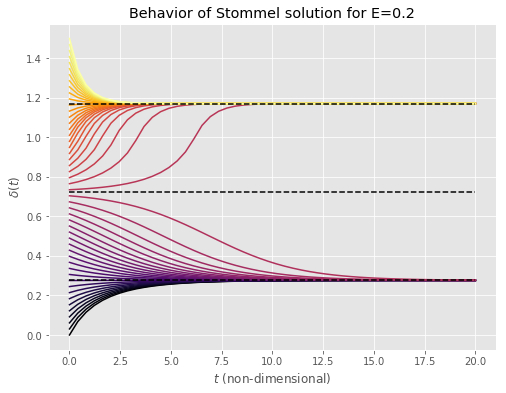

In [6]:
E = 0.2

tmax = 20    
t = np.linspace(0,tmax); nt = len(t)
d0vec = np.linspace(0,1.5); nd = len(d0vec)
d = np.zeros((nt,nd)) # define array 

for k in range(nd):  # loop over initial conditions
    y = odeint(delta_eqn, d0vec[k], t, args=(E,)) # invoke ODE solver
    d[:,k] = y.flatten() # store result in an array
    
# Now plot it    
f,ax = plt.subplots(1,1,figsize=(8,6))
ax.set_color_cycle([plt.cm.inferno(s) for s in np.linspace(0, 1, nd)])
ax.plot(t,d)    
ax.hlines(fixed_pts(E),0,tmax,linestyle='dashed',zorder=50)
ax.set_title('Behavior of Stommel solution for E='+str(E))
ax.set_xlabel(r'$t$ (non-dimensional)')
ax.set_ylabel(r'$\delta(t)$')
    

Pretty, eh? The color of each line indicates its origin, and dashed black lines indicate the fixed points. You can see that depending on this origin, the salinity converges to two equilibrium values: one around 1.17, the other around 0.28.  In between, curves that start around the third fixed point over around it for a brief time, then go join their friends around the other fixed points. 

** Question 5** Why do you think that is the case? (Hint: Look at the previous stability diagram of $E=0.2$)

** Answer 5 here**

** Question 6** Repeat the analysis above for $E = 0.25$ and $E=0.26$.  How many fixed points do you obtain in each case? Does it make sense given the stability diagram? How quickly do trajectories converge to the fixed points, and what does this depend on?

** Answer 6 here**










### Hysteresis ###

As mentioned in class, the system can exhibit hysteresis if forced appropriately across thresholds. In this section we force the system with a periodically varying freshwater flux to investigate this behavior. 

$$E = E_c + A*cos(\frac{2\pi}{T}t)$$ 
where $E_c=1/4$ is the critical value (see above), $A$ is some amplitude, and $T$ is a forcing 

Next we define a slightly modified version of the funciton delta_eqn() that accounts for this forcing 

In [8]:
def delta_eqn_forced(y,t,A=0.5,period=5):
    forc = 0.25+A*np.sin(2*np.pi*t/period)
    return forc-abs(1-y)*y

Voilà. All you need is to specify values of A, period, and the starting point $d0 = \delta(0)$. Here we do so for some choice of parameters:

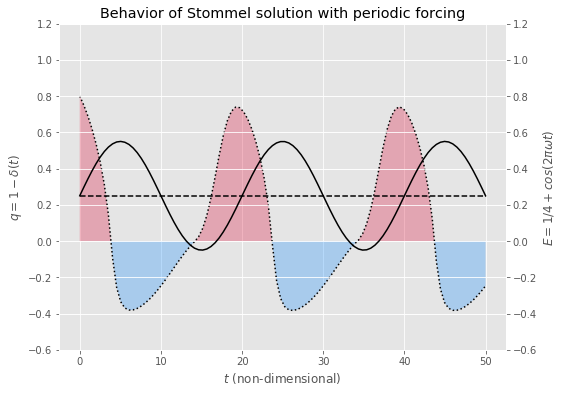

In [9]:
tmax = 50    
t = np.linspace(0,tmax,100)
A = .3
period = 20
d0 = 0.2

forc = 0.25+A*np.sin(2*np.pi*t/period)
df = odeint(delta_eqn_forced, d0, t, args=(A,period)).flatten() 


zer = 0*t  # define zero line  
q = 1-df   # define transport

f,ax1 = plt.subplots(1,1,figsize=(8,6))
ax1.plot(t,q,'k:')    
ax1.set_title('Behavior of Stommel solution with periodic forcing')
ax1.set_xlabel(r'$t$ (non-dimensional)')
ax1.set_ylabel(r'$q=1-\delta(t)$')
ax1.fill_between(t, zer, q , where= (q >= zer), facecolor='Crimson', interpolate=True,alpha=0.3)
ax1.fill_between(t, zer, q , where= (q < zer), facecolor='DodgerBlue', interpolate=True,alpha=0.3)
ax2 = ax1.twinx()
ax2.plot(t,forc,'k',label='forcing')
ax2.set_ylabel(r'$E = 1/4+cos(2\pi\omega t)$')
ax2.hlines(0.25,0,tmax,linestyle='dashed',zorder=50)


ax1.set_yticks(np.linspace(-.6, 1.2, 10))
ax2.set_yticks(np.linspace(-.6, 1.2, 10))

Now investigate the behavior of the solution as you change A and d0. 

**Question 7** For which values of these parameters do you obtain periodic solutions? Are they symmetric about 0? If so, why not? Do the switches happen when the forcing changes sign? If not, why?
Based on the stability diagram above, explain physically what happens as the system is moved across the $E_c$ threshold (dashed line).  

**Answer 7** ...





**Question 8**
Does the same behavior happen for a linear system? Repeat the above exercise with the following function:

In [7]:
def delta_lin_forced(y,t,A=0.5,period=5):
    forc = 0.25+A*np.sin(2*np.pi*t/period)
    dydt = forc-y
    return dydt

Conclude on the role of nonlinearity and its implications for MOC stability.

## References
 - Marotzke, J., 1990: Instabilities and multiple equilibria of the thermohaline circulation. Ph.D. thesis. Berichte aus dem Institut für Meereskunde Kiel, 94, 126pp.
 - Stommel, H., 1961: Thermohaline convection with two stable regimes of flow. Tellus, 13, 224-230.